<a href="https://colab.research.google.com/github/cmunozcortes/cs249/blob/main/lab_3_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Due Date: Monday, November 2nd, 11:59pm**

- Save a copy of the notebook to your Google Drive. You can do that by going to the menu and clicking `File` > `Save` > `SAVE A COPY IN DRIVE`.
- Fill out the missing parts and run the code modules.
- Answer the questions (if any) in a separate document or by adding a new `Text` block inside the Colab.
- Download the solved notebook by going to the menu and clicking `File` > `Download .ipynb`.
- Make sure the downloaded version is showing your solutions.
- Upload your solutions to CCLE (under "Colab Assignment #3: Hypothesis Testing" for Week 4).

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Download the data for house prices.

In [ ]:
!wget -O house_prices.csv https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0

--2020-10-30 00:15:17--  https://www.dropbox.com/s/v14nl9kcgqoqn36/house_prices.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/v14nl9kcgqoqn36/house_prices.csv [following]
--2020-10-30 00:15:17--  https://www.dropbox.com/s/raw/v14nl9kcgqoqn36/house_prices.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd526b8dd4abae131d790b3f78d.dl.dropboxusercontent.com/cd/0/inline/BCMjWoiMjMquM9b6wS-_-kae-qAF3rl8h9fsFGeEvLFQgNKOCipL1IB_0HM7F40q4Pdwx1X_y7kC69ldv2aQb_4KHP1cmzsDv2DgqR84E-tsk4CvpUSZNwNgJ7N2gZhoQ5E/file# [following]
--2020-10-30 00:15:18--  https://ucd526b8dd4abae131d790b3f78d.dl.dropboxusercontent.com/cd/0/inline/BCMjWoiMjMquM9b6wS-_-kae-qAF3rl8h9fsFGeEvLFQgNKOCipL1IB_0HM7F40q4Pdwx1X_y7kC69ldv2aQb_4KHP1cmzsDv

Load house prices data into a Pandas data frame.

In [ ]:
prices_data = pd.read_csv("house_prices.csv")

print("The first three rows of the data are:")
prices_data.head(3)

The first three rows of the data are:


,house_type,sqft,age,price
0,condominium,1380.0,1.873884,231430.0
1,townhouse,2137.0,0.655100,276776.0
2,condominium,1639.0,22.591568,199513.0


Print summary statistics for the data.

In [ ]:
prices_data.describe()

,sqft,age,price
count,200.000000,200.000000,200.000000
mean,1721.690000,42.100913,254548.075000
std,423.824539,35.277504,62757.260134
min,767.000000,0.270202,110380.000000
25%,1443.750000,16.022210,212453.750000
50%,1678.500000,34.432747,249524.500000
75%,2021.750000,59.732957,289058.750000
max,2927.000000,148.107500,472792.000000


##Simple Linear Regression

Using linear regression study the relationship between the square footage of houses in our data and their average price. 

1.   Use `LinearRegression` method in `scikit-learn` to fit a linear regression

In [ ]:
x = prices_data[['sqft']]
y = prices_data.price

# TODO: Fit a linear regression to x and y
model = LinearRegression()
model.fit(x,y)
# END OF TODO

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

2. Gather the estimated coefficients from the model.

In [ ]:
# TODO: Assign correct values to intercept and sqft_est_coef
intercept = model.intercept_
sqft_est_coef = model.coef_[0]
# END OF TODO

print("intercept of the model is: ", intercept)
print("coefficient of square footage is: ", sqft_est_coef)

intercept of the model is:  146762.72091842652
coefficient of square footage is:  62.60439108177052


3. How can we interpret the coeffient of the square footage?

_Answer_: A 1-unit increase in the square footage is associated with a ~$63 increase in the average price of a house in the housing market covered by the data.

4. Compute the residual sum of squares from the model.

In [ ]:
# Calculate the fitted values for each X
y_hat = model.predict(x)

# TODO: Assign correct value to rss
rss = np.sum((y - y_hat)**2)
# END OF TODO

print("RSS for the model is: ", rss)

RSS for the model is:  643657321143.4912


##Multiple Linear Regression

Using linear regression study the relationship between the features in our data and the average price. 

1.   Divide features and the response variable into different objects.

In [ ]:
# TODO: Assign features to X and the outcome to y
X = prices_data.iloc[:,:3]
y = prices_data.price
# END OF TODO
X.columns

Index(['house_type', 'sqft', 'age'], dtype='object')

2. Add indicator variables for house type into the  data frame of the features.

In [ ]:
# TODO: Update X
X = pd.get_dummies(X, columns=['house_type'], drop_first=True)
# END OF TODO

if isinstance(X, pd.DataFrame):
  print(X.head(3))

     sqft        age  house_type_sfh  house_type_townhouse
0  1380.0   1.873884               0                     0
1  2137.0   0.655100               0                     1
2  1639.0  22.591568               0                     0


3. Add age squared as a new feature to the data frame of the features.

In [ ]:
# TODO: Update X
X['age_squared'] = X['age']**2
# END OF TODO

if isinstance(X, pd.DataFrame):
  print(X.head(3))

     sqft        age  house_type_sfh  house_type_townhouse  age_squared
0  1380.0   1.873884               0                     0     3.511440
1  2137.0   0.655100               0                     1     0.429156
2  1639.0  22.591568               0                     0   510.378927


4. Apply a linear regression using `OLS` method in `statsmodels`. Don't forget to add an intercept column to the features using `sm.add_constant`.

In [ ]:
# TODO: fit the model
x_with_intercept = sm.add_constant(X)
model = sm.OLS(y, x_with_intercept).fit()
# END OF TODO

if isinstance(model, sm.regression.linear_model.RegressionResultsWrapper):
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     18.14
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           9.39e-15
Time:                        00:15:42   Log-Likelihood:                -2454.3
No. Observations:                 200   AIC:                             4921.
Df Residuals:                     194   BIC:                             4940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.035e+05 

5. From the model summary, what is the estimated coefficient for square footage (i.e., $\hat{\beta}_{\text{sqft}}$)? Can we confidently say that the real coefficient of square footage (i.e., $\beta_{\text{sqft}}$) is positive? How do you interpret the estimated coefficient?

_Answer_: the estimated coefficient for square footage is ~31.2. Given the confidence interval of (8.594, 53.8), we can assert we are confident the real value of the coefficient is positive, i.e. higher square footage is associated with higher house price. The coefficient should be interpreted as follows: keeping all other features the same, a 1-unit increase in square footage is associated with a $31 increase in the average price of a house.

6. What is the R-squared of the model?

In [ ]:
# R-squared of the model
print(f"R-squared of model: {model.rsquared}")

R-squared of model: 0.3186187071548071


7. Compute the fitted values and the residuals for the model, and plot residuals vs. fitted values. Does the plot show any obvious issues with the model?

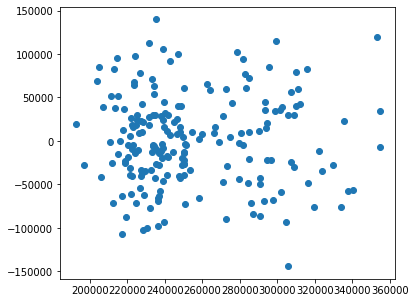

In [ ]:
# TODO: Assign correct values to y_hat and residuals
y_hat = model.predict(x_with_intercept)
residuals = y - y_hat
# END OF TODO

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6,5))
_ = ax.scatter(y_hat, residuals)

_Answer_: since there is no clear observable pattern in the residuals, we can assert that there's no obvious issues with the model.